In [116]:
#Importing Packages and Libraries
import os
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pickle
warnings.filterwarnings('ignore')

In [144]:
custom_palette =["#269ffb", "#26e7a5", "#febb3b", "#ff6077", "#c0d775", "#fb8126", "#e72667", "#45ffe4"]
sns.set_palette(custom_palette)
# custom style 
plt.rcParams['axes.facecolor'] = 'white'     # background color
plt.rcParams['grid.color'] = 'lightgray'     # grid color
plt.rcParams['axes.edgecolor'] = 'lightgray' # axes color
plt.rcParams['axes.labelcolor'] = 'black'    # label color
plt.rcParams['xtick.color'] = 'black'        # xtick color
plt.rcParams['ytick.color'] = 'black'        # ytick color
plt.rcParams['axes.grid'] = True             # enable grid
plt.rcParams['axes.titlesize'] = 15         # title size
plt.rcParams['axes.titleweight'] = 'bold'  # title weight
plt.rcParams['axes.labelsize'] = 12          # label size

sns.set_style("whitegrid")

In [59]:
#check files
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)

../data/IBM-HR-Employee-Attrition.csv


In [60]:
#importing data
emp_df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 2. Data Preprocessing

In [61]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [62]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [63]:
# drop EmployeeCount, EmployeeNumber, Over18, StandardHours --> beacuse thy are not relevant or have no variablity
emp_df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace=True)

In [64]:
#encodeing categorical features
def cat_encoder(df):
    encoder = LabelEncoder()
    print('Encoded Categorical Features')
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])
            
            print(f"\n Feature '{col}':")
            for class_name, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
                print(f"{class_name} -> {encoded_value}")
            
    return df   

In [65]:
encoded_emp_df = cat_encoder(emp_df)

Encoded Categorical Features

 Feature 'Attrition':
No -> 0
Yes -> 1

 Feature 'BusinessTravel':
Non-Travel -> 0
Travel_Frequently -> 1
Travel_Rarely -> 2

 Feature 'Department':
Human Resources -> 0
Research & Development -> 1
Sales -> 2

 Feature 'EducationField':
Human Resources -> 0
Life Sciences -> 1
Marketing -> 2
Medical -> 3
Other -> 4
Technical Degree -> 5

 Feature 'Gender':
Female -> 0
Male -> 1

 Feature 'JobRole':
Healthcare Representative -> 0
Human Resources -> 1
Laboratory Technician -> 2
Manager -> 3
Manufacturing Director -> 4
Research Director -> 5
Research Scientist -> 6
Sales Executive -> 7
Sales Representative -> 8

 Feature 'MaritalStatus':
Divorced -> 0
Married -> 1
Single -> 2

 Feature 'OverTime':
No -> 0
Yes -> 1


In [66]:
encoded_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

## 2. Feature Engineering

In [67]:
counts = encoded_emp_df['Attrition'].value_counts()
print(counts)

0    1233
1     237
Name: Attrition, dtype: int64


In [68]:
print(f" Proportion of Retained Employees : Attrited Employees is {(counts[0]/counts[1]):.1f} : 1")

 Proportion of Retained Employees : Attrited Employees is 5.2 : 1


The dataset is imblanced with bias towards Retained Employees.

In [69]:
# X, y
X = encoded_emp_df.drop('Attrition', axis = 1)
y = encoded_emp_df['Attrition']

In [70]:
print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))
print("Before OverSampling, counts of label '1' (Attrition = Yes): {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0' (Attrition = No) : {}".format(sum(y==0)))

Before OverSampling, the shape of X: (1470, 30)
Before OverSampling, the shape of y: (1470,) 

Before OverSampling, counts of label '1' (Attrition = Yes): 237
Before OverSampling, counts of label '0' (Attrition = No) : 1233


In [71]:
over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X, y)
Counter(y)

Counter({0: 1233, 1: 237})

In [72]:
print('After OverSampling, the shape of X_res: {}'.format(X_res.shape))
print('After OverSampling, the shape of y_res: {} \n'.format(y_res.shape))
print("After OverSampling, counts of label '1' (Attrition = Yes): {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0' (Attrition = No) : {}".format(sum(y_res==0)))

After OverSampling, the shape of X_res: (2281, 30)
After OverSampling, the shape of y_res: (2281,) 

After OverSampling, counts of label '1' (Attrition = Yes): 1048
After OverSampling, counts of label '0' (Attrition = No) : 1233


In [73]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=1234)

In [74]:
print('The shape of X_train: {}'.format(X_train.shape))
print('The shape of y_train: {}'.format(y_train.shape))
print('The shape of X_test : {}'.format(X_test.shape))
print('The shape of X_test : {}'.format(X_test.shape))

The shape of X_train: (1824, 30)
The shape of y_train: (1824,)
The shape of X_test : (457, 30)
The shape of X_test : (457, 30)


### 2.1 Correlation Matrix

In [75]:
train_set = X_train.copy(deep=True)
train_set['Attrition'] = y_train

In [76]:
train_set.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1058,34,2,790,2,24,4,3,1,0,40,2,2,7,2,2,4599,7815,0,1,23,4,3,0,16,2,4,15,9,10,10,1
2266,29,1,717,1,3,2,1,4,0,32,3,1,5,3,1,3990,4262,1,0,12,3,1,0,7,2,1,7,3,6,6,1
283,55,2,147,1,20,2,5,2,1,37,3,2,2,4,1,5415,15972,3,1,19,3,4,1,12,4,3,10,7,0,8,0
1585,25,2,333,1,4,3,2,2,1,44,2,1,6,3,1,5638,26867,1,1,11,3,3,0,5,1,3,5,3,0,2,1
847,34,1,669,1,1,3,3,4,1,97,2,2,0,1,2,5343,25755,0,0,20,4,3,0,14,3,3,13,9,4,9,0


In [77]:
train_set.shape

(1824, 31)

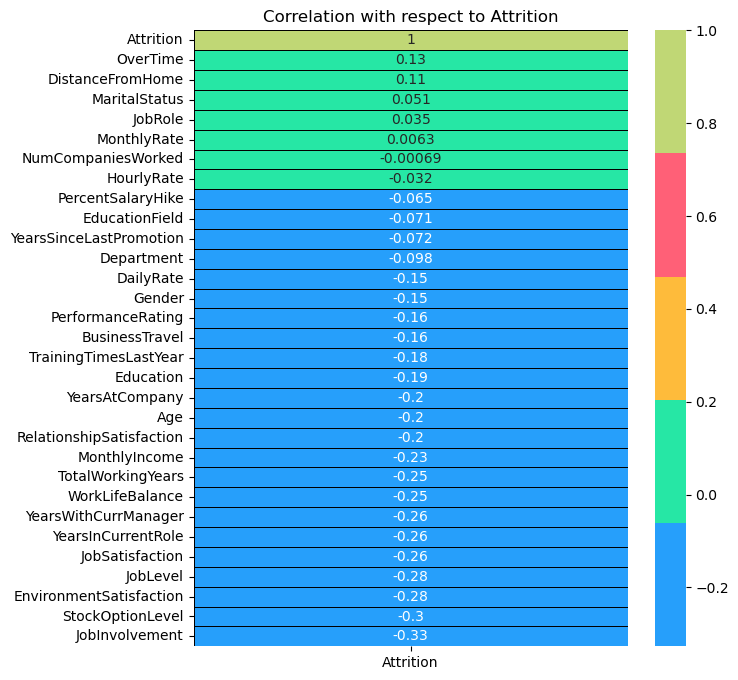

In [78]:
corr = train_set.corrwith(train_set['Attrition']).sort_values(ascending=False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,8))
sns.heatmap(corr,annot = True,cmap = custom_palette[0:5],linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with respect to Attrition');

 - None of the features have at least moderate positive or negative correlation with Attrition. 

### 2.2 Feature Selection for Categorical Features

In [79]:
# selecting categorical features
categorical_features = ['BusinessTravel','Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

In [80]:
cat_features = X_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

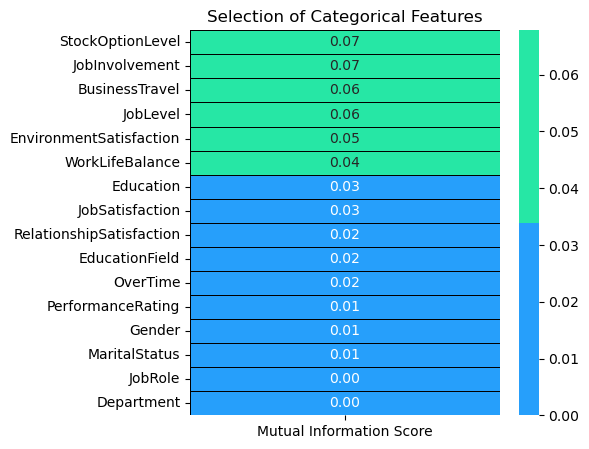

In [81]:
# Mutual Information Test
best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(cat_features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(cat_features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = custom_palette[0:2],linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- According to the Mutual Information Score, none of the features should be selected because the Mutual Inforamtion Scroes of Attrition with categorical features are very low.

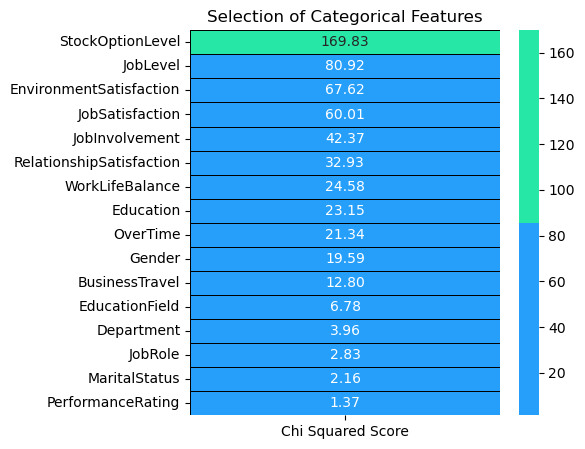

In [82]:
# chi Square Test
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(cat_features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(cat_features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = custom_palette[0:2],linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- According to the Chi Squared Test Score ( Threshold = 25 ) we can drop, 'Gender', 'OverTime', 'WorkLifeBalance', 'EducationField', 'BusinessTravel, 'Department', 'MaritalStatus', 'JobRole', 'PerformanceRating'.

### 2.3 Feature Selection for Numerical Features

In [83]:
# ANOVA Test

In [84]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [85]:
num_features = X_train.loc[:,numerical_features]

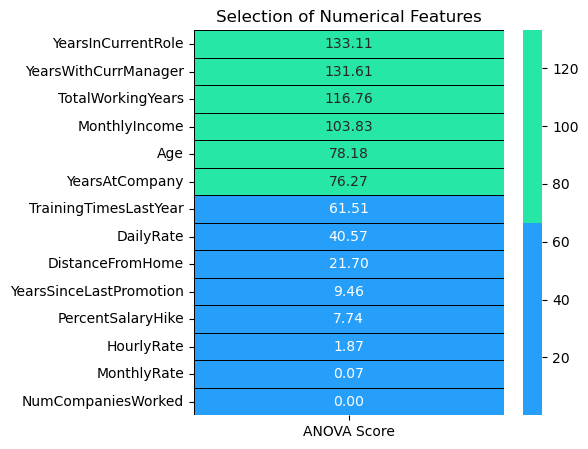

In [86]:
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(num_features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(num_features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = custom_palette[0:2],linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to ANOVA Test score ( Threshold = 50) we can drop, YearsSinceLastPromortion, DistanceFromHome, PercentSalaryHike, DailyRate, HourlyRate, MonthlyRate and NumCompaniesWorked.

In [87]:
# columns to be dropped
drop_columns = ['Gender', 'OverTime', 'WorkLifeBalance', 'EducationField', 'BusinessTravel', 
                'Department', 'MaritalStatus', 'JobRole', 'PerformanceRating',
                'YearsSinceLastPromotion', 'DistanceFromHome', 'PercentSalaryHike', 'DailyRate', 
                'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked']

In [88]:
X_train = X_train.drop(columns=drop_columns, axis=1)
X_test = X_test.drop(columns=drop_columns, axis=1)

In [89]:
print('After Feature Selection : ')
print('The shape of X_train: {}'.format(X_train.shape))
print('The shape of y_train: {}'.format(y_train.shape))
print('The shape of X_test : {}'.format(X_test.shape))
print('The shape of X_test : {}'.format(X_test.shape))

After Feature Selection : 
The shape of X_train: (1824, 14)
The shape of y_train: (1824,)
The shape of X_test : (457, 14)
The shape of X_test : (457, 14)


In [90]:
print("Selected Best Columns : \n", X_train.columns)

Selected Best Columns : 
 Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


## 3. Data Scaling

In [91]:
# Normalization
min_max_scaler = MinMaxScaler()

def data_normalizer(feature):
    X_train[feature] = min_max_scaler.fit_transform(X_train[[feature]])
    X_test[feature] = min_max_scaler.fit_transform(X_test[[feature]])
    return X_train, X_test

# Standardization
standard_scaler = StandardScaler()
def data_standardizer(feature):
    X_train[feature] = standard_scaler.fit_transform(X_train[[feature]])
    X_test[feature] = standard_scaler.fit_transform(X_test[[feature]])
    return X_train, X_test

In [92]:
feature_set_1 = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsWithCurrManager']
for feature in feature_set_1:
    data_normalizer(feature)

In [93]:
feature_set_2 = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear']
for feature in feature_set_2:
    data_standardizer(feature)

In [94]:
X_train.head()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1858,1.232802,-0.775953,1.387226,-0.731458,-0.839343,-0.456871,0.086405,0.447683,0.462633,0.450,0.314667,0.200,0.352941,0.352941
927,0.021670,1.250301,0.464432,0.612127,0.119306,-0.456871,0.232439,1.398293,-0.763883,0.450,-0.514744,0.400,0.823529,0.705882
2134,0.462082,0.237174,-0.458361,0.612127,2.036603,-0.456871,0.742949,1.398293,-0.763883,0.550,-1.344154,0.175,0.235294,0.117647
1014,-0.528844,2.263428,-1.381155,0.612127,2.036603,-0.456871,0.814038,0.447683,-0.763883,0.225,0.314667,0.075,0.117647,0.000000
1613,-0.859152,-0.775953,-0.458361,-0.731458,-0.839343,-1.376664,0.073571,0.447683,1.689149,0.025,-0.514744,0.025,0.000000,0.000000


In [95]:
X_test.head()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
730,-0.578591,-0.750821,-0.471944,1.930595,1.148129,-1.391837,0.547596,0.471510,3.223232,0.243243,1.094109,0.222222,0.388889,0.411765
952,-0.466360,0.292113,1.395401,0.619626,-0.777357,-0.468659,0.067204,-1.496344,-0.775909,0.081081,-0.531932,0.083333,0.111111,0.117647
130,0.880411,0.292113,-0.471944,1.930595,-0.777357,0.454519,0.195657,1.455437,-0.775909,0.486486,-0.531932,0.083333,0.111111,0.117647
2223,1.441566,-0.750821,-0.471944,0.619626,1.148129,-0.468659,0.383987,-0.512417,-0.775909,0.243243,-1.344953,0.222222,0.388889,0.411765
462,-0.129667,1.335046,1.395401,1.930595,0.185386,1.377696,0.227177,1.455437,-0.775909,0.270270,0.281088,0.277778,0.388889,0.411765


## 4. Modeling

In [96]:
# Model Train
def model_train(model):
    model.fit(X_train, y_train)
    return model

In [97]:
class DataUpdater:
    def __init__(self, columns):
        self.df = pd.DataFrame(columns=columns)

    def update_df(self, data):
        self.df = self.df.append(data, ignore_index=True)
        
    def get_dataframe(self):
        return self.df
        
performance_df = DataUpdater(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])        

In [98]:
#Model Evaluation
def model_evaluation(model, model_name):

    print("\033[1m\033[4m" + model_name +" Model Evaluation"+ "\033[0m")
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy : {np.round(accuracy,3)*100} %\n")
    
    # Classification Report
    print("Classification Report ")
    model_report = classification_report(y_test,y_pred, output_dict=True)
    print(pd.DataFrame(model_report))
  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
    
     # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = custom_palette[0:2],fmt ='', ax = ax1)
    ax1.set_title("Confusion Matrix")
    
    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    #ROC auc score
    roc_score = roc_auc_score(y_test,y_pred)
    print("\nROC_AUC Score : ",'{0:.2%}\n'.format(roc_score))
    # Plot ROC curve
    ax2.plot(fpr, tpr, color='#ff6077', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='#c0d775', lw=2, linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc='lower right')
    plt.tight_layout()
    
    fig.show()
    
    #Performance Table Update
    performance_df.update_df({'Model Name':model_name, 
                                'Accuracy':accuracy,
                                'Precision':model_report['macro avg']['precision'],
                                'Recall':model_report['macro avg']['recall'], 
                                'F1 Score':model_report['macro avg']['f1-score'], 
                                'ROC AUC Score':roc_score})

### 4.1 Logistic Regression

Logistic Regression Model Evaluation

Model Accuracy : 81.6 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.812245    0.820755  0.816193    0.816500      0.816342
recall       0.839662    0.790909  0.816193    0.815286      0.816193
f1-score     0.825726    0.805556  0.816193    0.815641      0.816016
support    237.000000  220.000000  0.816193  457.000000    457.000000

ROC_AUC Score :  81.53%



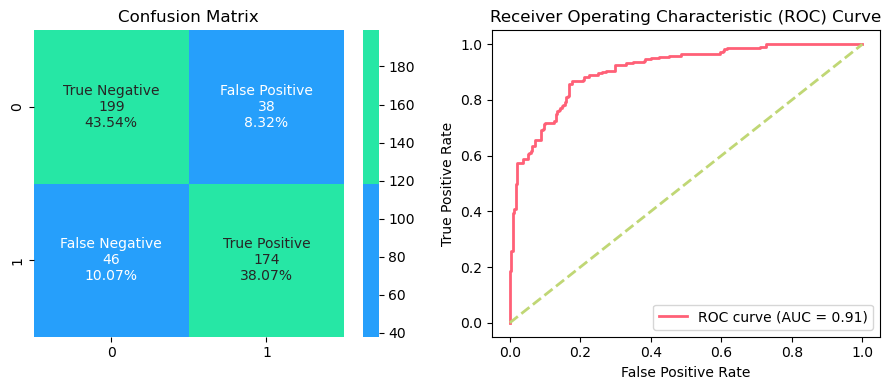

In [99]:
lr = LogisticRegression()
model_train(lr)
model_evaluation(lr, 'Logistic Regression')

### 4.2 Random Forest 

Random Forest Classifier Model Evaluation

Model Accuracy : 89.5 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.873518    0.921569  0.894967    0.897543      0.896649
recall       0.932489    0.854545  0.894967    0.893517      0.894967
f1-score     0.902041    0.886792  0.894967    0.894417      0.894700
support    237.000000  220.000000  0.894967  457.000000    457.000000

ROC_AUC Score :  89.35%



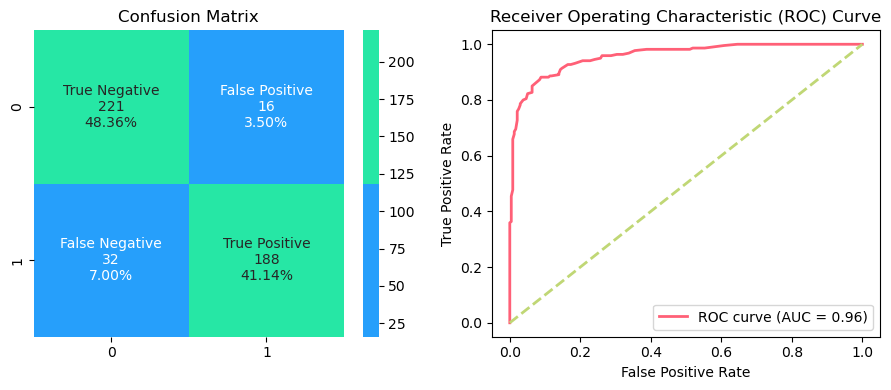

In [100]:
rf = RandomForestClassifier()
model_train(rf)
model_evaluation(rf, 'Random Forest Classifier')

### 4.3 XGBoost Classifier

XGBoost Classifier Model Evaluation

Model Accuracy : 81.6 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.927374    0.744604  0.816193    0.835989      0.839389
recall       0.700422    0.940909  0.816193    0.820666      0.816193
f1-score     0.798077    0.831325  0.816193    0.814701      0.814083
support    237.000000  220.000000  0.816193  457.000000    457.000000

ROC_AUC Score :  82.07%



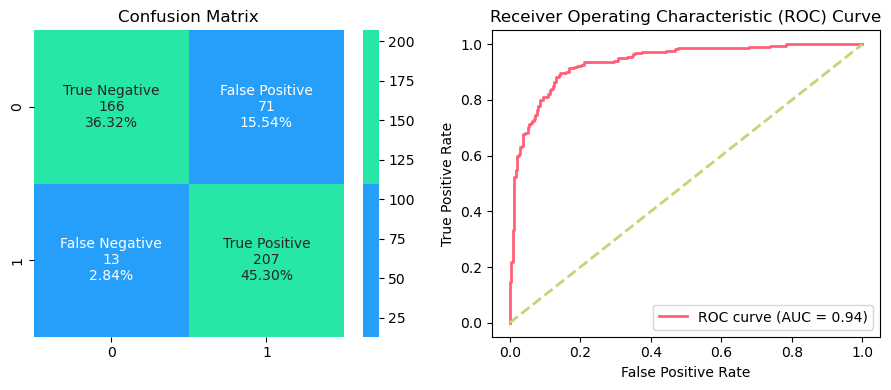

In [101]:
xgc = XGBClassifier()
model_train(xgc)
model_evaluation(xgc, 'XGBoost Classifier')

### 4.4 Naive Bayes

Naive Bayes Model Evaluation

Model Accuracy : 75.1 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.794258    0.713710  0.750547    0.753984      0.755482
recall       0.700422    0.804545  0.750547    0.752484      0.750547
f1-score     0.744395    0.756410  0.750547    0.750402      0.750179
support    237.000000  220.000000  0.750547  457.000000    457.000000

ROC_AUC Score :  75.25%



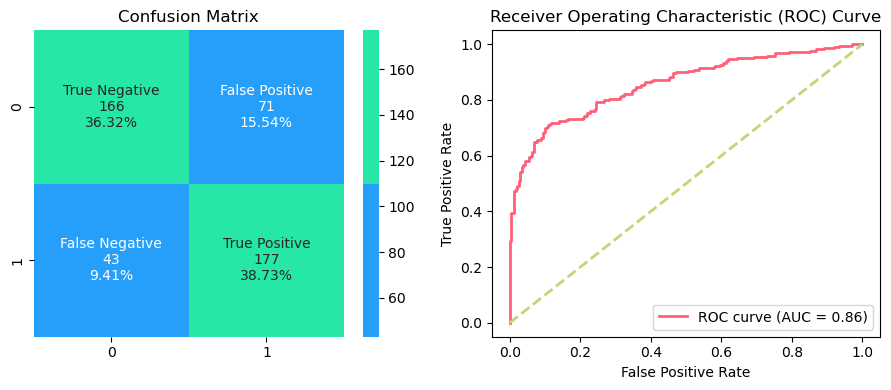

In [102]:
nb = GaussianNB()
model_train(nb)
model_evaluation(nb, 'Naive Bayes')

### 4.5 K - Nearest Neighbors Classifier

In [103]:
#finding optimal 'K' using Accuracy score
correct_sum = []
k_range = range(1,20)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

In [104]:
result_K = pd.DataFrame(data = correct_sum).rename_axis('K value')
result_K.columns=['Accuracy']
result_K.index = result_K.index +1
result_K.T

K value,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Accuracy,385,369,396,396,397,394,389,391,388,395,393,394,393,395,385,386,387,386,387


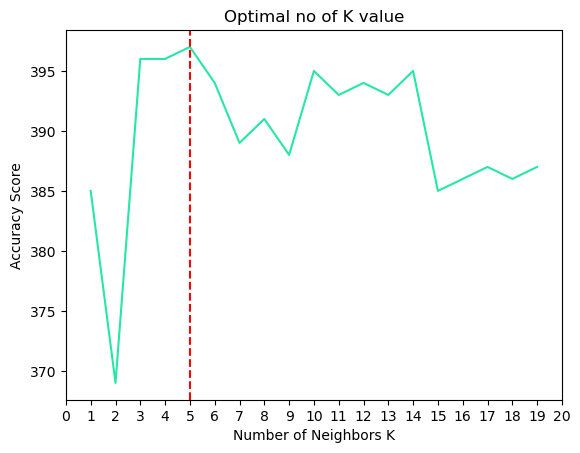

In [105]:
#visualizing optimal 'k'
plt.plot(k_range, correct_sum, color='#26e7a5')
plt.xticks(range(21))
plt.title('Optimal no of K value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
#finding highest accuracy index
max_index = np.argmax(correct_sum)
max_value = correct_sum[max_index]
# add a vertical line at the highest accuracy K value
plt.axvline(x=k_range[max_index], color='r', linestyle='--')
plt.show()

In [106]:
optimal_k = correct_sum.index(max(correct_sum)) +1
print("The optimal number of neighbors is", optimal_k)

The optimal number of neighbors is 5


K Nearest Neighbors Classifier Model Evaluation

Model Accuracy : 86.2 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.850806    0.875598  0.862144    0.863202      0.862741
recall       0.890295    0.831818  0.862144    0.861057      0.862144
f1-score     0.870103    0.853147  0.862144    0.861625      0.861940
support    237.000000  220.000000  0.862144  457.000000    457.000000

ROC_AUC Score :  86.11%



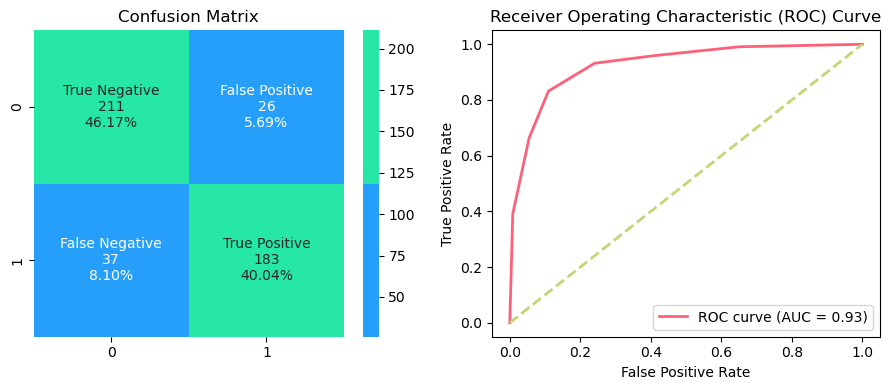

In [107]:
knn = KNeighborsClassifier(n_neighbors= 6)
model_train(knn)
model_evaluation(knn, 'K Nearest Neighbors Classifier')

### 4.6 Support Vector Classifier

Support Vector Classifier Model Evaluation

Model Accuracy : 87.1 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.844961    0.904523  0.870897    0.874742      0.873634
recall       0.919831    0.818182  0.870897    0.869007      0.870897
f1-score     0.880808    0.859189  0.870897    0.869998      0.870400
support    237.000000  220.000000  0.870897  457.000000    457.000000

ROC_AUC Score :  86.90%



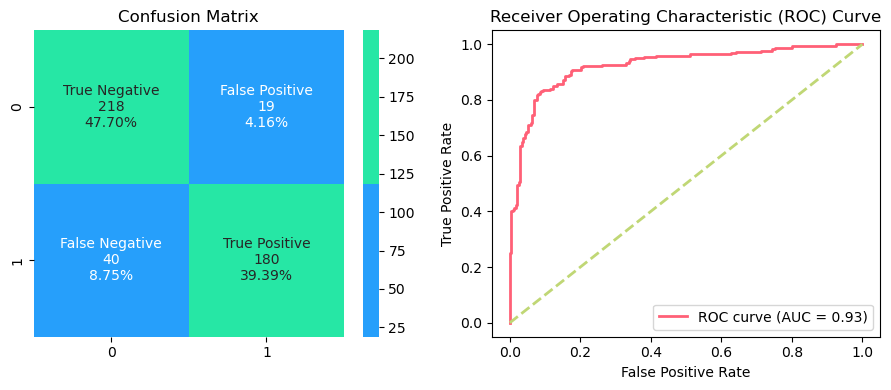

In [108]:
svc = SVC(probability=True)
model_train(svc)
model_evaluation(svc, 'Support Vector Classifier')

### 4.7 CatBoost Classifier

CatBoost Classifier Model Evaluation

Model Accuracy : 90.4 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.890688    0.919048   0.90372    0.904868      0.904340
recall       0.928270    0.877273   0.90372    0.902771      0.903720
f1-score     0.909091    0.897674   0.90372    0.903383      0.903595
support    237.000000  220.000000   0.90372  457.000000    457.000000

ROC_AUC Score :  90.28%



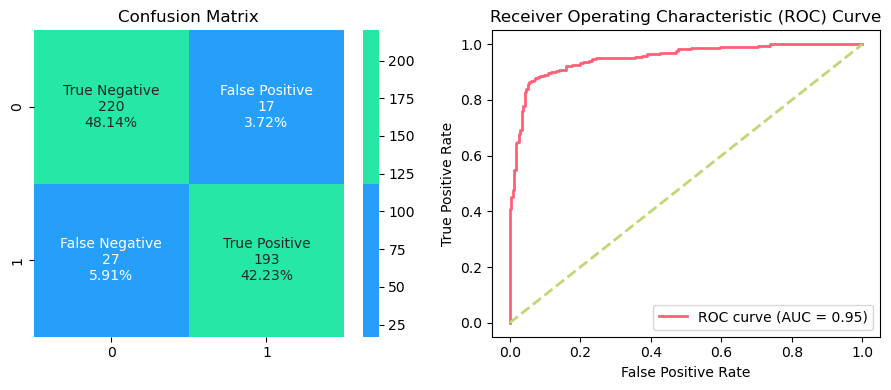

In [109]:
cb = CatBoostClassifier(verbose=False)
model_train(cb)
model_evaluation(cb, 'CatBoost Classifier')

### 4.8 Model Summary

In [110]:
df = performance_df.get_dataframe()
df.index += 1

In [158]:
# Highlight the max accuracy
def highlight_max_accuracy(s):
    is_max = s == s.max()
    return ['background-color: #ff6077 ;color:black' if v else '' for v in is_max]

# Highlight the max model name
def color_model_for_max_accuracy(col):
    max_accuracy_idx = df['Accuracy'].idxmax()
    colors = ['background-color: #26e7a5; color:black; ' if i == max_accuracy_idx else '' for i in col.index]
    return colors

# Highlight the max ROC AUC score
def highlight_max_roc(s):
    is_max = s == s.max()
    return ['background-color: #ff6077; color:black' if v else '' for v in is_max]

model_summary_df = (df.style
            .apply(highlight_max_accuracy, subset=['Accuracy'])
            .apply(color_model_for_max_accuracy, subset=['Model Name'])
            .apply(highlight_max_roc, subset=['ROC AUC Score'])
           )
model_summary_df

,Model Name,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
1,Logistic Regression,0.816193,0.816500,0.815286,0.815641,0.815286
2,Random Forest Classifier,0.894967,0.897543,0.893517,0.894417,0.893517
3,XGBoost Classifier,0.816193,0.835989,0.820666,0.814701,0.820666
4,Naive Bayes,0.750547,0.753984,0.752484,0.750402,0.752484
5,K Nearest Neighbors Classifier,0.862144,0.863202,0.861057,0.861625,0.861057
6,Support Vector Classifier,0.870897,0.874742,0.869007,0.869998,0.869007
7,CatBoost Classifier,0.903720,0.904868,0.902771,0.903383,0.902771


In [157]:
with open("styled_df.html", "w") as f:
    f.write(model_summary_df.render())

- According to the Accuracy and ROC AUC score, We can select CatBoost Classifier.

## 5. Hyperparameter Tuning

In [128]:
param_grid = {
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [3, 5],
    'iterations': [500, 1000]
}

# Grid Search
grid = GridSearchCV(estimator=cb, param_grid=param_grid, cv=3)
grid_fit=grid.fit(X_train, y_train)

In [129]:
print("Best parameters  : ",grid.best_params_)
print("Best cross-validation score: ",grid.best_score_)

Best parameters  :  {'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.03}
Best cross-validation score:  0.849780701754386


In [130]:
best_model = grid_fit.best_estimator_
best_model

Best Model (CatBoost Classifier) Model Evaluation

Model Accuracy : 90.8 %

Classification Report 
                    0           1  accuracy   macro avg  weighted avg
precision    0.901235    0.915888  0.908096    0.908561      0.908289
recall       0.924051    0.890909  0.908096    0.907480      0.908096
f1-score     0.912500    0.903226  0.908096    0.907863      0.908035
support    237.000000  220.000000  0.908096  457.000000    457.000000

ROC_AUC Score :  90.75%



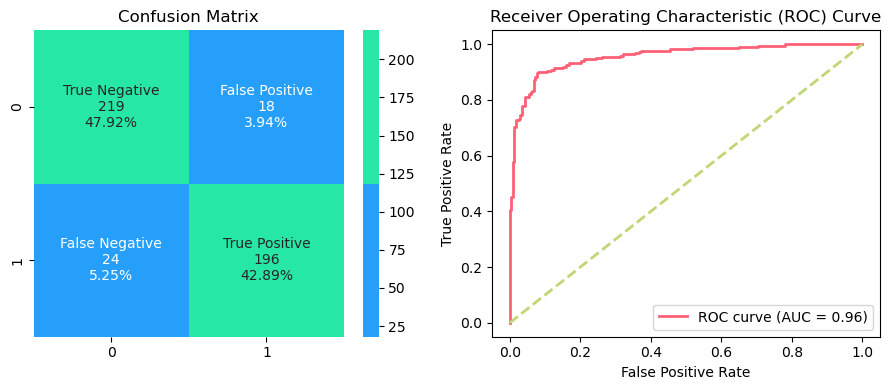

In [131]:
model_evaluation(best_model, 'Best Model (CatBoost Classifier)')

## 6. Feature Importance

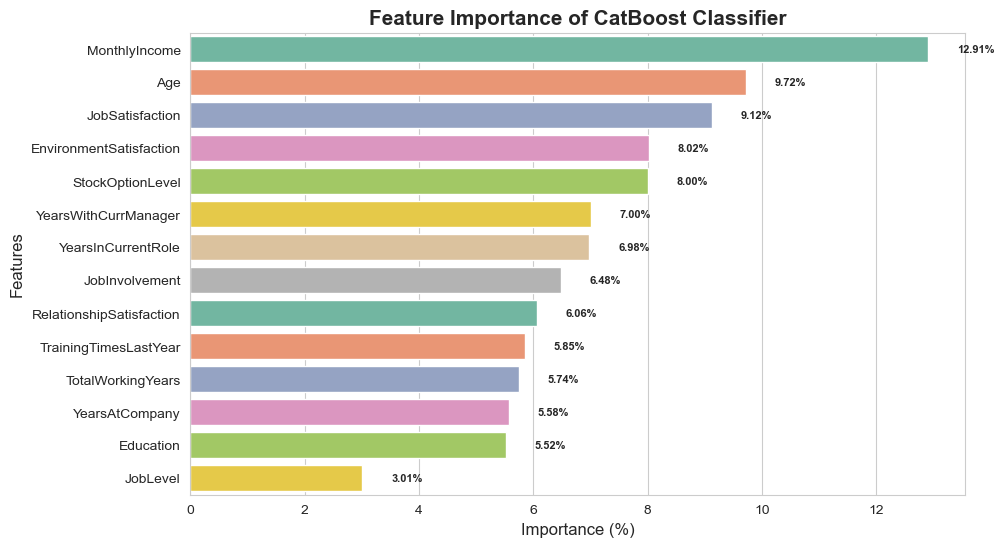

In [147]:
import matplotlib.patches as mpatches
# Feature importances
feature_importance = best_model.feature_importances_
features = X_train.columns

# Feature importances df
feature_imp = pd.DataFrame({
    'features': features,
    'importance': feature_importance
})


feature_imp = feature_imp.sort_values(by='importance', ascending=False)
feature_imp['importance'] = round((feature_imp['importance']/feature_imp['importance'].sum() )* 100, 2)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_imp['importance'], y=feature_imp['features'], palette="Set2")

# text
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,  
            p.get_y() + p.get_height() / 2, '{:1.2f}%'.format(width), ha="left", va="center", fontsize=8,fontweight = 'bold')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance of CatBoost Classifier')
plt.show()

In [154]:
#saving model
with open('../final_model/employee_attrition_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)